# Preprocess Chrome History

In [1]:
import pandas as pd 

In [2]:
chrome_history = pd.read_json('/bigtemp/ahs5ce/CS6501_Projects/Project3/raw/History.json', orient='index')

### Most common daily sites i visit

In [14]:
import json
from collections import Counter, defaultdict
from datetime import datetime
from urllib.parse import urlparse

def load_history(path):
    with open(path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    browser_history = data.get('Browser History', [])
    # Filter out entries with YouTube URLs
    filtered_history = [entry for entry in browser_history if 'youtube.com' not in entry.get('url', '') and 'youtu.be' not in entry.get('url', '')]
    return filtered_history
    # return data.get('Browser History', [])

def domain_from_url(url):
    try:
        netloc = urlparse(url).netloc
        # strip port, lowercase
        return netloc.split(':')[0].lower()
    except:
        return None

def most_common_sites_daily(history, top_n=5):
    daily_counts = defaultdict(Counter)
    for entry in history:
        ts = entry.get('time_usec')
        url = entry.get('url')
        if ts and url:
            # Chrome’s time_usec is microseconds since Unix epoch
            dt = datetime.utcfromtimestamp(ts / 1e6)
            date_str = dt.date().isoformat()
            domain = domain_from_url(url)
            if domain:
                daily_counts[date_str][domain] += 1

    # For each date, return the top N domains and counts
    return {date: counts.most_common(top_n)
            for date, counts in daily_counts.items()}

history = load_history('/bigtemp/ahs5ce/CS6501_Projects/Project3/raw/History.json')
top_sites = most_common_sites_daily(history, top_n=10)
for date in sorted(top_sites):
    print(f"{date}:")
    for domain, count in top_sites[date]:
        print(f"  {domain}: {count}")

2024-04-13:
  arxiv.org: 3
  drops.dagstuhl.de: 1
  qiyanjun.github.io: 1
2024-04-14:
  arxiv.org: 157
  www.google.com: 34
  scholar.google.com: 22
  llms4science-community.github.io: 17
  huggingface.co: 14
  chat.openai.com: 13
  mail.google.com: 7
  www.overleaf.com: 3
  qiyanjun.github.io: 3
  rec.virginia.edu: 2
2024-04-15:
  arxiv.org: 241
  docs.google.com: 30
  canvas.its.virginia.edu: 19
  www.google.com: 13
  virginia.zoom.us: 6
  qiyanjun.github.io: 4
  calebziems.com: 4
  shibidp.its.virginia.edu: 4
  www.forbes.com: 3
  yumeng5.github.io: 3
2024-04-16:
  engineering.cmu.edu: 138
  mail.google.com: 52
  arxiv.org: 22
  www.doa.virginia.gov: 21
  chat.openai.com: 16
  www.google.com: 14
  github.com: 11
  qiyanjun.github.io: 5
  www.overleaf.com: 4
  www.change.org: 3
2024-04-17:
  arxiv.org: 217
  docs.google.com: 106
  openreview.net: 91
  scholar.google.com: 44
  ieeexplore.ieee.org: 25
  www.google.com: 19
  scholar.googleusercontent.com: 10
  chat.openai.com: 10
  soun

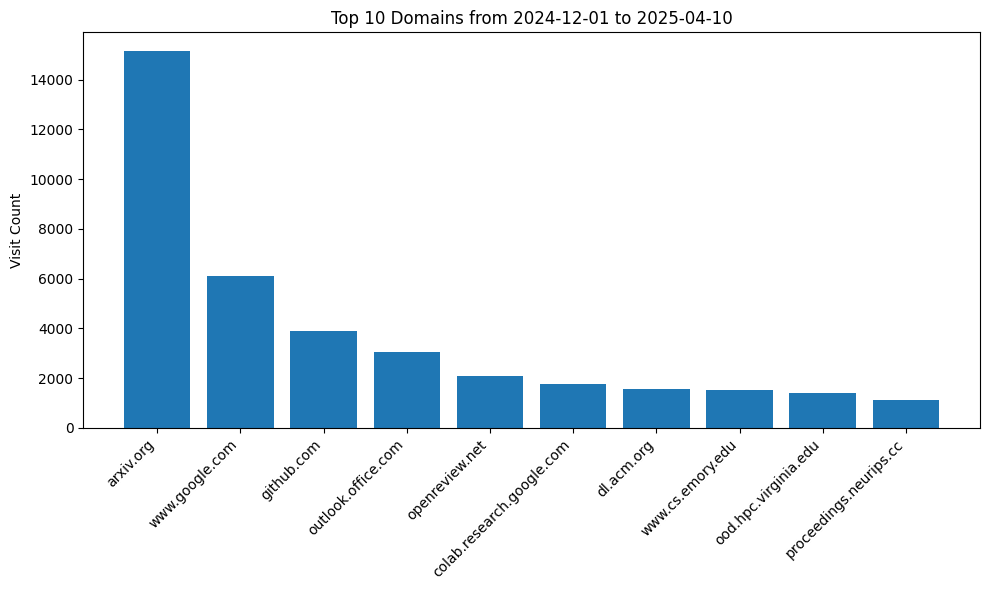

In [5]:
from datetime import datetime, date
import matplotlib.pyplot as plt

def count_domains_between(history, start_date, end_date):
    counts = Counter()
    for entry in history:
        ts = entry.get('time_usec')
        url = entry.get('url')
        if not ts or not url:
            continue

        # Convert Chrome’s microsecond timestamp to a date
        visit_date = datetime.utcfromtimestamp(ts / 1e6).date()

        # Check if in the desired range
        if start_date <= visit_date <= end_date:
            domain = domain_from_url(url)
            counts[domain] += 1

    return counts

def plot_top_domains(counts, n, start_date, end_date):
    top = counts.most_common(n)
    if not top:
        print("No visits in the specified date range.")
        return
    domains, counts_vals = zip(*top)
    plt.figure(figsize=(10, 6))
    plt.bar(domains, counts_vals)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Visit Count')
    plt.title(f'Top {n} Domains from {start_date.isoformat()} to {end_date.isoformat()}')
    plt.tight_layout()
    plt.show()

START_DATE = date(2024, 12, 1)
END_DATE   = date(2025, 4, 10)
TOP_N = 10

domain_counts = count_domains_between(history, START_DATE, END_DATE)
plot_top_domains(domain_counts, TOP_N, START_DATE, END_DATE)


In [6]:
domain_counts

Counter({'arxiv.org': 15150,
         'www.google.com': 6101,
         'github.com': 3888,
         'outlook.office.com': 3061,
         'openreview.net': 2079,
         'colab.research.google.com': 1765,
         'dl.acm.org': 1554,
         'www.cs.emory.edu': 1501,
         'ood.hpc.virginia.edu': 1380,
         'proceedings.neurips.cc': 1115,
         'pmc.ncbi.nlm.nih.gov': 917,
         'web.stanford.edu': 898,
         'docs.google.com': 677,
         'mail.google.com': 612,
         'ieeexplore.ieee.org': 472,
         'aclanthology.org': 415,
         'www.overleaf.com': 406,
         'drive.google.com': 371,
         'lucid.app': 362,
         'www.ijcai.org': 349,
         'wordcounts.com': 343,
         'shibidp.its.virginia.edu': 338,
         'huggingface.co': 331,
         'watermark.silverchair.com': 312,
         'tomfletcher.github.io': 290,
         'canvas.its.virginia.edu': 268,
         'anonymous.4open.science': 256,
         'www.linkedin.com': 240,
         'vi

### Most common sites I visit for life events + 1 days before hand. 
 

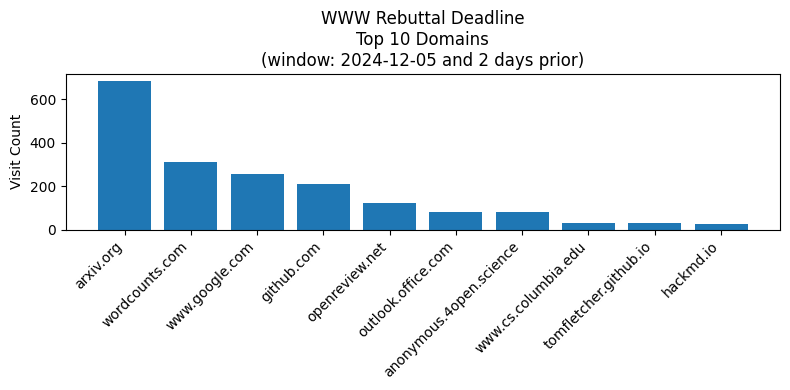

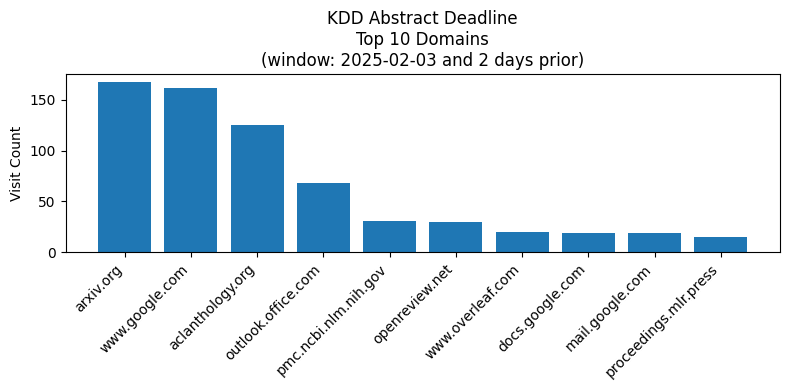

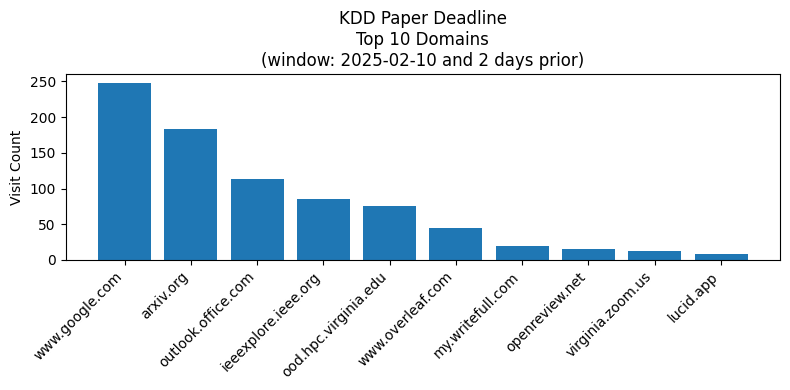

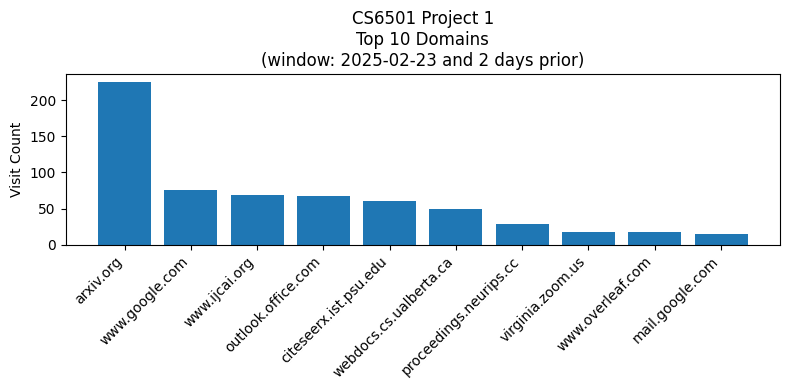

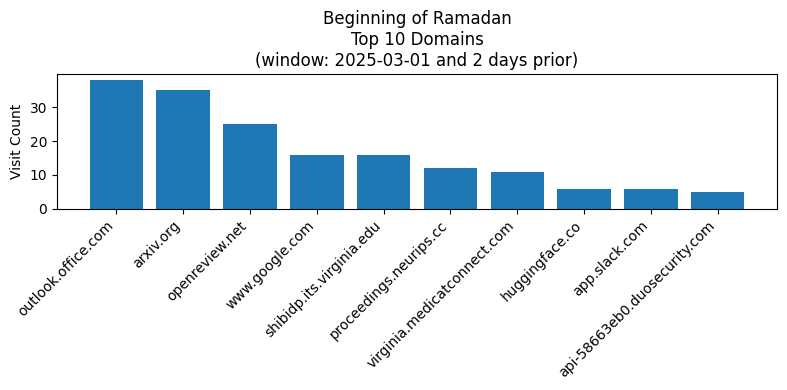

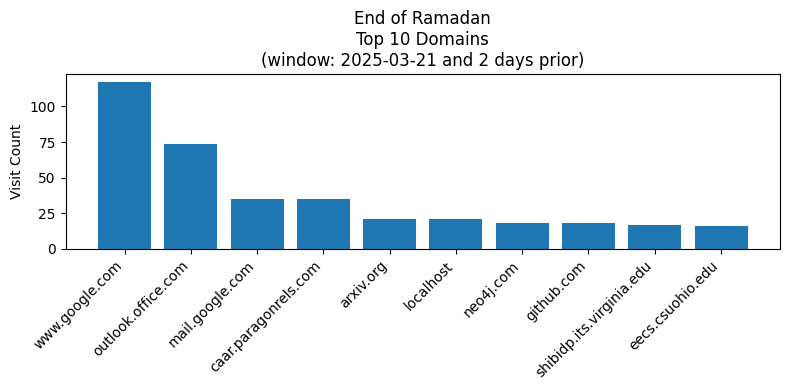

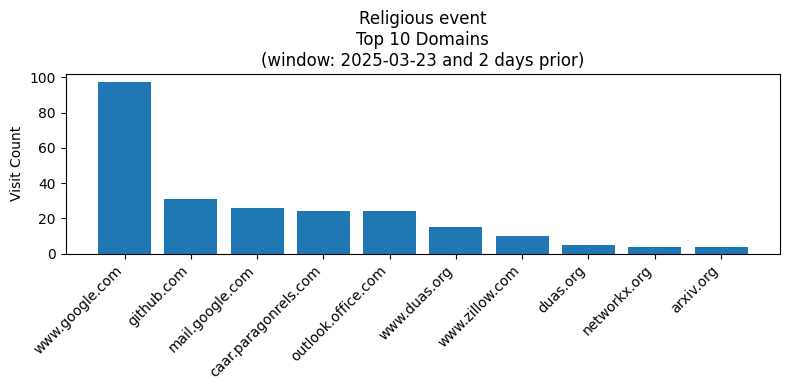

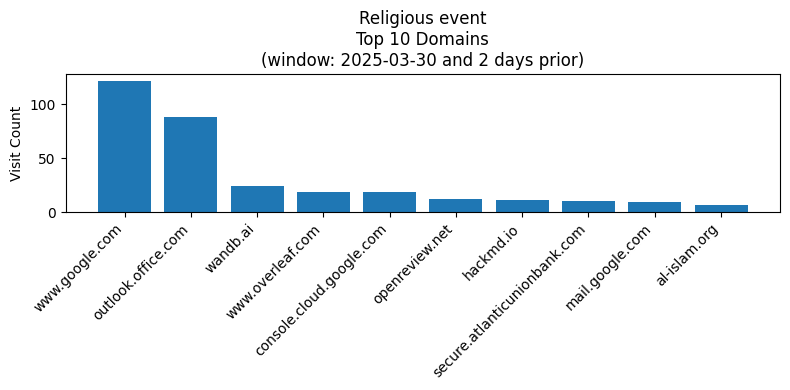

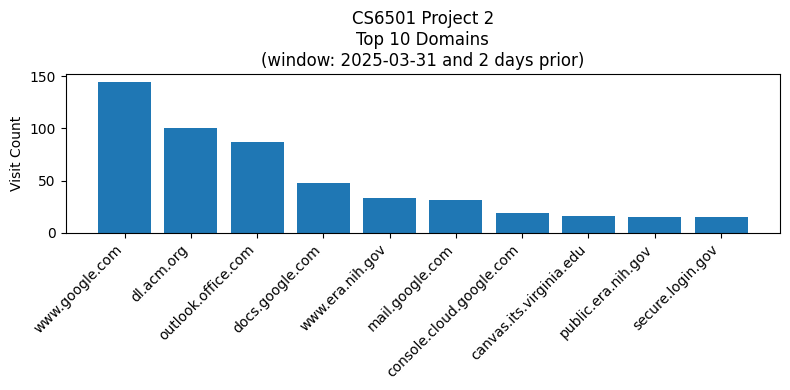

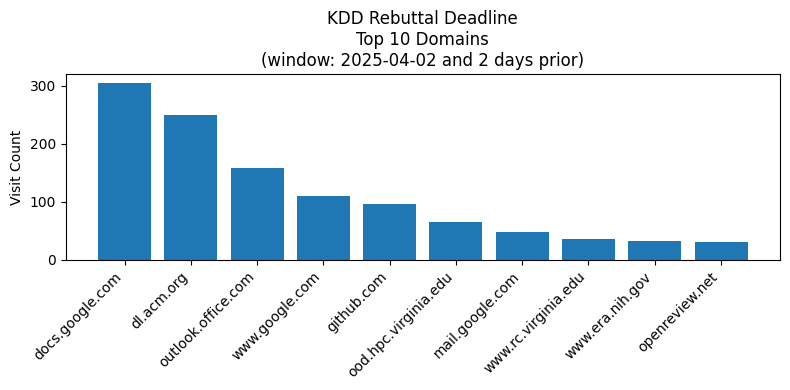

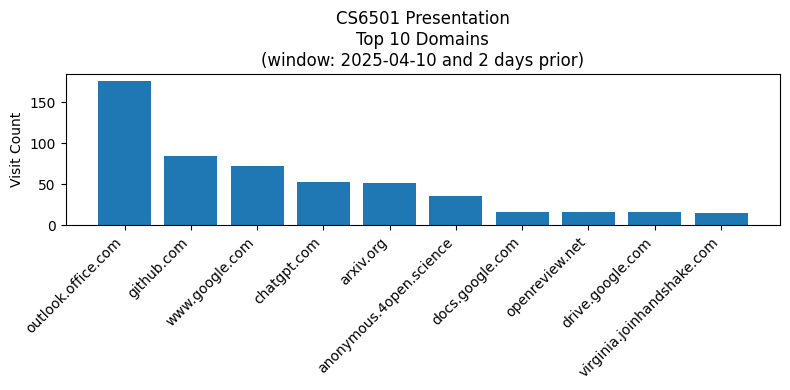

In [7]:
from datetime import datetime, timedelta, date

def most_common_sites_daily(history):
    """
    Returns a dict mapping 'YYYY-MM-DD' -> Counter(domain -> visits on that day).
    """
    daily_counts = defaultdict(Counter)
    for entry in history:
        ts = entry.get('time_usec')
        url = entry.get('url')
        if not ts or not url:
            continue
        dt = datetime.utcfromtimestamp(ts / 1e6)
        day = dt.date().isoformat()
        domain = domain_from_url(url)
        if domain:
            daily_counts[day][domain] += 1
    return daily_counts

def windowed_top_sites(daily_counts, target_dates, buffer_days=2, top_n=5):
    result = {}
    for d in target_dates:
        if isinstance(d, str):
            d = datetime.fromisoformat(d).date()
        window = [(d - timedelta(days=i)).isoformat() for i in range(buffer_days+1)]
        c = Counter()
        for day in window:
            c.update(daily_counts.get(day, Counter()))
        result[d.isoformat()] = c.most_common(top_n)
    return result

daily = most_common_sites_daily(history)

# List your target dates here:
targets = [
    date(2024, 12, 5),
    date(2025, 2, 3),
    date(2025, 2, 10),
    date(2025, 2, 23),
    date(2025, 3, 1),
    date(2025, 3, 21),
    date(2025, 3, 23),
    date(2025, 3, 30),
    date(2025, 3, 31),
    date(2025, 4, 2),
    date(2025, 4, 10),
]

event_titles = [
    "WWW Rebuttal Deadline",
    "KDD Abstract Deadline",
    "KDD Paper Deadline", 
    "CS6501 Project 1",
    "Beginning of Ramadan",
    "End of Ramadan", 
    "Religious event",
    "Religious event",
    "CS6501 Project 2",
    "KDD Rebuttal Deadline",
    "CS6501 Presentation"
]


top_n = 10

top_sites = windowed_top_sites(daily, targets, buffer_days=2, top_n=top_n)

for date_obj, title in zip(targets, event_titles):
    key = date_obj.isoformat()
    sites = top_sites.get(key, [])
    if not sites:
        print(f"No data for {title} ({key})")
        continue

    domains, counts = zip(*sites)
    plt.figure(figsize=(8, 4))
    plt.bar(domains, counts)
    plt.xticks(rotation=45, ha='right')
    plt.title(f"{title}\nTop {top_n} Domains\n(window: {key} and 2 days prior)")
    plt.ylabel("Visit Count")
    plt.tight_layout()

plt.show()

In [ ]:
# chrome_history = chrome_history.T
# chrome_history = chrome_history['Browser History']
# chrome_history = pd.DataFrame(chrome_history.tolist())
# from urllib.parse import urlparse

# # --- Step 1: Convert timestamps and filter by date ---
# # Convert 'time_usec' to datetime
# chrome_history['time_usec'] = pd.to_datetime(chrome_history['time_usec'])

# # Filter to include only the last 6 months of data
# six_months_ago = pd.Timestamp.now() - pd.DateOffset(months=6)
# chrome_history_recent = chrome_history[chrome_history['time_usec'] >= six_months_ago].copy()

# # --- Step 2: Exclude YouTube-related entries ---
# # Remove rows where the URL contains 'youtube.com' or 'youtu.be'
# chrome_history_recent = chrome_history_recent[~chrome_history_recent['url'].str.contains(r"youtube\.com|youtu\.be", case=False, na=False)]

# # --- Step 3: Estimate session durations ---
# # Sort by timestamp
# chrome_history_recent = chrome_history_recent.sort_values(by='time_usec')

# # Compute time differences between consecutive events
# chrome_history_recent['time_diff'] = chrome_history_recent['time_usec'].diff()

# # Define a threshold (e.g., 30 minutes) to cap continuous browsing gaps
# threshold = pd.Timedelta(minutes=30)
# chrome_history_recent['session_duration'] = chrome_history_recent['time_diff'].apply(lambda x: x if pd.notnull(x) and x <= threshold else pd.Timedelta(0))

# # Create a new column for the date (dropping the time)
# chrome_history_recent['date'] = chrome_history_recent['time_usec'].dt.date

# # --- Step 4: Extract domain names ---
# def extract_domain(url):
#     try:
#         parsed = urlparse(url)
#         return parsed.netloc
#     except Exception:
#         return None

# chrome_history_recent['domain'] = chrome_history_recent['url'].apply(extract_domain)

# # --- Step 5: Aggregate overall daily Chrome time ---
# daily_chrome_time = chrome_history_recent.groupby('date')['session_duration'].sum().reset_index()
# daily_chrome_time['chrome_time_minutes'] = daily_chrome_time['session_duration'].dt.total_seconds() / 60

# # --- Step 6: Compute top 5 sites per day based on time spent ---
# # Group by date and domain to sum the session durations for each site
# domain_daily = chrome_history_recent.groupby(['date', 'domain'])['session_duration'].sum().reset_index()
# domain_daily['duration_seconds'] = domain_daily['session_duration'].dt.total_seconds()

# # Define a function to extract the top 5 domains for a given date
# def top_5_sites_for_date(date):
#     daily_data = domain_daily[domain_daily['date'] == date]
#     sorted_domains = daily_data.sort_values(by='duration_seconds', ascending=False)
#     # Return a list of the top 5 domain names (if less than 5, it will return whatever is available)
#     top_domains = list(sorted_domains['domain'].head(5))
#     return top_domains

# # Apply the function to each date
# daily_chrome_time['top_5_sites'] = daily_chrome_time['date'].apply(top_5_sites_for_date)



In [24]:
chrome_history_recent

,favicon_url,page_transition_qualifier,title,url,time_usec,client_id,time_diff,session_duration,date,domain


In [ ]:
daily_chrome_time

# Preprocess YouTube History

In [1]:
import json
from datetime import datetime, date, timedelta
from collections import defaultdict

# Load the JSON file
with open('/bigtemp/ahs5ce/CS6501_Projects/Project3/raw/watch-history.json', 'r') as f:
    watch_data = json.load(f)

# Define custom date range
start_date = date(2024, 11, 30)
end_date = date(2025, 4, 1)  # inclusive

# Count videos watched each day
daily_counts = defaultdict(int)

for entry in watch_data:
    time_str = entry.get('time')
    if time_str:
        dt = datetime.fromisoformat(time_str.replace('Z', '+00:00'))
        watch_day = dt.date()
        if start_date <= watch_day <= end_date:
            daily_counts[watch_day.isoformat()] += 1

# Print results sorted by date
for day in sorted(daily_counts.keys()):
    print(f"{day}: {daily_counts[day]} videos watched")

2024-11-30: 238 videos watched
2024-12-01: 147 videos watched
2024-12-02: 99 videos watched
2024-12-03: 78 videos watched
2024-12-04: 321 videos watched
2024-12-05: 231 videos watched
2024-12-06: 161 videos watched
2024-12-07: 219 videos watched
2024-12-08: 341 videos watched
2024-12-09: 323 videos watched
2024-12-10: 515 videos watched
2024-12-11: 815 videos watched
2024-12-12: 270 videos watched
2024-12-13: 209 videos watched
2024-12-14: 39 videos watched
2024-12-15: 442 videos watched
2024-12-16: 479 videos watched
2024-12-17: 366 videos watched
2024-12-18: 578 videos watched
2024-12-19: 244 videos watched
2024-12-20: 423 videos watched
2024-12-21: 260 videos watched
2024-12-22: 304 videos watched
2024-12-23: 497 videos watched
2024-12-24: 647 videos watched
2024-12-25: 596 videos watched
2024-12-26: 102 videos watched
2024-12-27: 299 videos watched
2024-12-28: 315 videos watched
2024-12-29: 186 videos watched
2024-12-30: 195 videos watched
2024-12-31: 76 videos watched
2025-01-01: 

In [ ]:
Please help me create a dataframe that will include information from history.json (chrome history) and watch-history.json (youtube history).

This dataframe should have certain information from both dataframes for each day in range of dates.

For each day there should be:

Number of youtube videos watched
Total number of times chrome sites were visited
the top 10 domains visited each day with their visit count for that day.
Please use the functions and code I already defined in this notebook to help you create this dataframe.

In [6]:
import json
import pandas as pd
from collections import Counter, defaultdict
from datetime import datetime, date, timedelta
from urllib.parse import urlparse

def load_history(path):
    with open(path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    browser_history = data.get('Browser History', [])
    # Filter out entries with YouTube URLs
    filtered_history = [entry for entry in browser_history if 'youtube.com' not in entry.get('url', '') and 'youtu.be' not in entry.get('url', '')]
    return filtered_history
    # return data.get('Browser History', [])

def domain_from_url(url):
    netloc = urlparse(url).netloc
    # strip port, lowercase
    return netloc.split(':')[0].lower()

def most_common_sites_daily(history, start_date, end_date, top_n=5):
    daily_counts = defaultdict(Counter)
    for entry in history:
        ts = entry.get('time_usec')
        url = entry.get('url')
        if ts and url:
            # Chrome’s time_usec is microseconds since Unix epoch
            dt = datetime.utcfromtimestamp(ts / 1e6)
            date_str = dt.date().isoformat()
            if start_date <= dt.date() <= end_date:
                domain = domain_from_url(url)

                if domain:
                    # print(date_str)
                    # print(daily_counts)
                    daily_counts[date_str][domain] += 1

    # For each date, return the top N domains and counts
    return {date: counts.most_common(top_n)
            for date, counts in daily_counts.items()}


def load_watch_history(path):
    with open(path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

def youtube_videos_watched_daily(watch_history, start_date, end_date):
    daily_counts = defaultdict(int)
    for entry in watch_history:
        time_str = entry.get('time')
        if time_str:
            dt = datetime.fromisoformat(time_str.replace('Z', '+00:00'))
            watch_day = dt.date()
            if start_date <= watch_day <= end_date:
                daily_counts[watch_day.isoformat()] += 1
    return daily_counts

# Define custom date range
start_date = date(2024, 12, 3)
end_date = date(2025, 4, 11)  # inclusive

# Load Chrome history and YouTube watch history
chrome_history = load_history('/bigtemp/ahs5ce/CS6501_Projects/Project3/raw/History.json')
youtube_history = load_watch_history('/bigtemp/ahs5ce/CS6501_Projects/Project3/raw/watch-history.json')

# Get daily stats
chrome_top_sites = most_common_sites_daily(chrome_history, start_date=start_date, end_date=end_date, top_n=10)
youtube_daily_counts = youtube_videos_watched_daily(youtube_history, start_date, end_date)

# Combine data into a DataFrame
all_dates = set(chrome_top_sites.keys()).union(youtube_daily_counts.keys())
data = []

for date in sorted(all_dates):
    youtube_count = youtube_daily_counts.get(date, 0)    
    chrome_visits = sum(count for _, count in chrome_top_sites.get(date, []))
    top_sites = chrome_top_sites.get(date, [])
    data.append({
        'date': date,
        'youtube_videos_watched': youtube_count,
        'chrome_visits': chrome_visits,
        'top_sites': top_sites
    })

df = pd.DataFrame(data)


In [7]:
import pandas as pd
import numpy as np
from datetime import date
from scipy.stats import pointbiserialr
from statsmodels.tsa.stattools import ccf
from sklearn.linear_model import LogisticRegression, LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load your data (replace with your actual load) ---
# df = pd.read_csv('your_timeseries.csv')
# For this example, assume df is already in memory:
#    date | youtube_videos_watched | chrome_visits | top_sites
# --- and your events lists: ---
targets = [
    date(2024, 12, 5),
    date(2025, 2, 3),
    date(2025, 2, 10),
    date(2025, 2, 23),
    date(2025, 3, 1),
    date(2025, 3, 21),
    date(2025, 3, 23),
    date(2025, 3, 30),
    date(2025, 3, 31),
    date(2025, 4, 2),
    date(2025, 4, 10),
]
event_titles = [
    "WWW Rebuttal Deadline",
    "KDD Abstract Deadline",
    "KDD Paper Deadline",
    "CS6501 Project 1",
    "Beginning of Ramadan",
    "Religious event",
    "Religious event",
    "CS6501 Project 2",
    "End of Ramadan",
    "CS6501 Presentation",
    "KDD Rebuttal Deadline",
]
event_types = [
    "academic","academic","academic",
    "academic","personal","personal",
    "personal","academic","personal",
    "academic","academic"
]

# --- 2. Data Preparation ---
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date').sort_index()

# Build events DataFrame and merge
events = pd.DataFrame({
    'date': pd.to_datetime(targets),
    'event_title': event_titles,
    'event_type': event_types
}).set_index('date')
df = df.join(events, how='left')

# One-hot encode event_title and event_type
df = pd.concat([
    df,
    pd.get_dummies(df['event_title'], prefix='ev'),
    pd.get_dummies(df['event_type'], prefix='type')
], axis=1).fillna(0)

# Expand top_sites list into columns for top 10 domains
# 1) get the top 10 overall
all_domains = df['top_sites'].explode().apply(lambda x: x[0])
top10 = all_domains.value_counts().head(10).index.tolist()

def mk_site_dict(lst):
    d = dict(lst)
    return {dom: d.get(dom, 0) for dom in top10}

site_counts = df['top_sites'].apply(mk_site_dict).apply(pd.Series)
df = pd.concat([df, site_counts], axis=1)

# --- 3. Correlation Analysis ---
# Point-biserial: academic days vs continuous metrics
r_youtube, p_youtube = pointbiserialr(df['type_academic'], df['youtube_videos_watched'])
r_chrome,  p_chrome  = pointbiserialr(df['type_academic'], df['chrome_visits'])
print(f"Point-biserial corr (academic vs YouTube): r={r_youtube:.3f}, p={p_youtube:.3f}")
print(f"Point-biserial corr (academic vs Chrome):  r={r_chrome:.3f}, p={p_chrome:.3f}")

# Spearman’s rho correlation matrix
corr_matrix = df[
    ['youtube_videos_watched','chrome_visits'] + top10 + ['type_academic','type_personal']
].corr(method='spearman')

# Cross-correlation function (lag analysis)
ccf_vals = ccf(df['type_academic'], df['youtube_videos_watched'])
lags = np.arange(len(ccf_vals))



Point-biserial corr (academic vs YouTube): r=-0.094, p=0.285
Point-biserial corr (academic vs Chrome):  r=-0.051, p=0.563


In [8]:
df['type_academic']

date
2024-12-03    False
2024-12-04    False
2024-12-05     True
2024-12-06    False
2024-12-07    False
              ...  
2025-04-07    False
2025-04-08    False
2025-04-09    False
2025-04-10     True
2025-04-11    False
Name: type_academic, Length: 130, dtype: bool

In [9]:
df

,youtube_videos_watched,chrome_visits,top_sites,event_title,event_type,ev_Beginning of Ramadan,ev_CS6501 Presentation,ev_CS6501 Project 1,ev_CS6501 Project 2,ev_End of Ramadan,...,www.google.com,outlook.office.com,arxiv.org,github.com,mail.google.com,www.overleaf.com,openreview.net,docs.google.com,shibidp.its.virginia.edu,drive.google.com
date,,,,,,,,,,,,,,,,,,,,,
2024-12-03,78,436,"[(arxiv.org, 189), (www.google.com, 70), (open...",0,0,False,False,False,False,False,...,70,30,189,31,0,0,49,0,8,0
2024-12-04,321,918,"[(arxiv.org, 476), (wordcounts.com, 214), (ope...",0,0,False,False,False,False,False,...,51,24,476,26,0,0,71,0,0,0
2024-12-05,231,575,"[(github.com, 154), (www.google.com, 135), (wo...",WWW Rebuttal Deadline,academic,False,False,False,False,False,...,135,27,18,154,0,0,0,0,0,0
2024-12-06,161,331,"[(arxiv.org, 62), (outlook.office.com, 47), (a...",0,0,False,False,False,False,False,...,32,47,62,11,0,0,28,0,0,0
2024-12-07,219,970,"[(colab.research.google.com, 459), (tomfletche...",0,0,False,False,False,False,False,...,44,0,0,0,14,0,22,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-07,679,284,"[(e-etik000.com, 74), (www.binance.us, 68), (o...",0,0,False,False,False,False,False,...,29,47,8,16,0,0,0,9,0,0
2025-04-08,103,249,"[(github.com, 66), (chatgpt.com, 51), (outlook...",0,0,False,False,False,False,False,...,29,39,11,66,0,0,0,10,0,0
2025-04-09,418,121,"[(outlook.office.com, 57), (openreview.net, 10...",0,0,False,False,False,False,False,...,10,57,0,6,0,5,10,7,0,9


In [10]:
events

,event_title,event_type
date,,
2024-12-05,WWW Rebuttal Deadline,academic
2025-02-03,KDD Abstract Deadline,academic
2025-02-10,KDD Paper Deadline,academic
2025-02-23,CS6501 Project 1,academic
2025-03-01,Beginning of Ramadan,personal
2025-03-21,Religious event,personal
2025-03-23,Religious event,personal
2025-03-30,CS6501 Project 2,academic
2025-03-31,End of Ramadan,personal


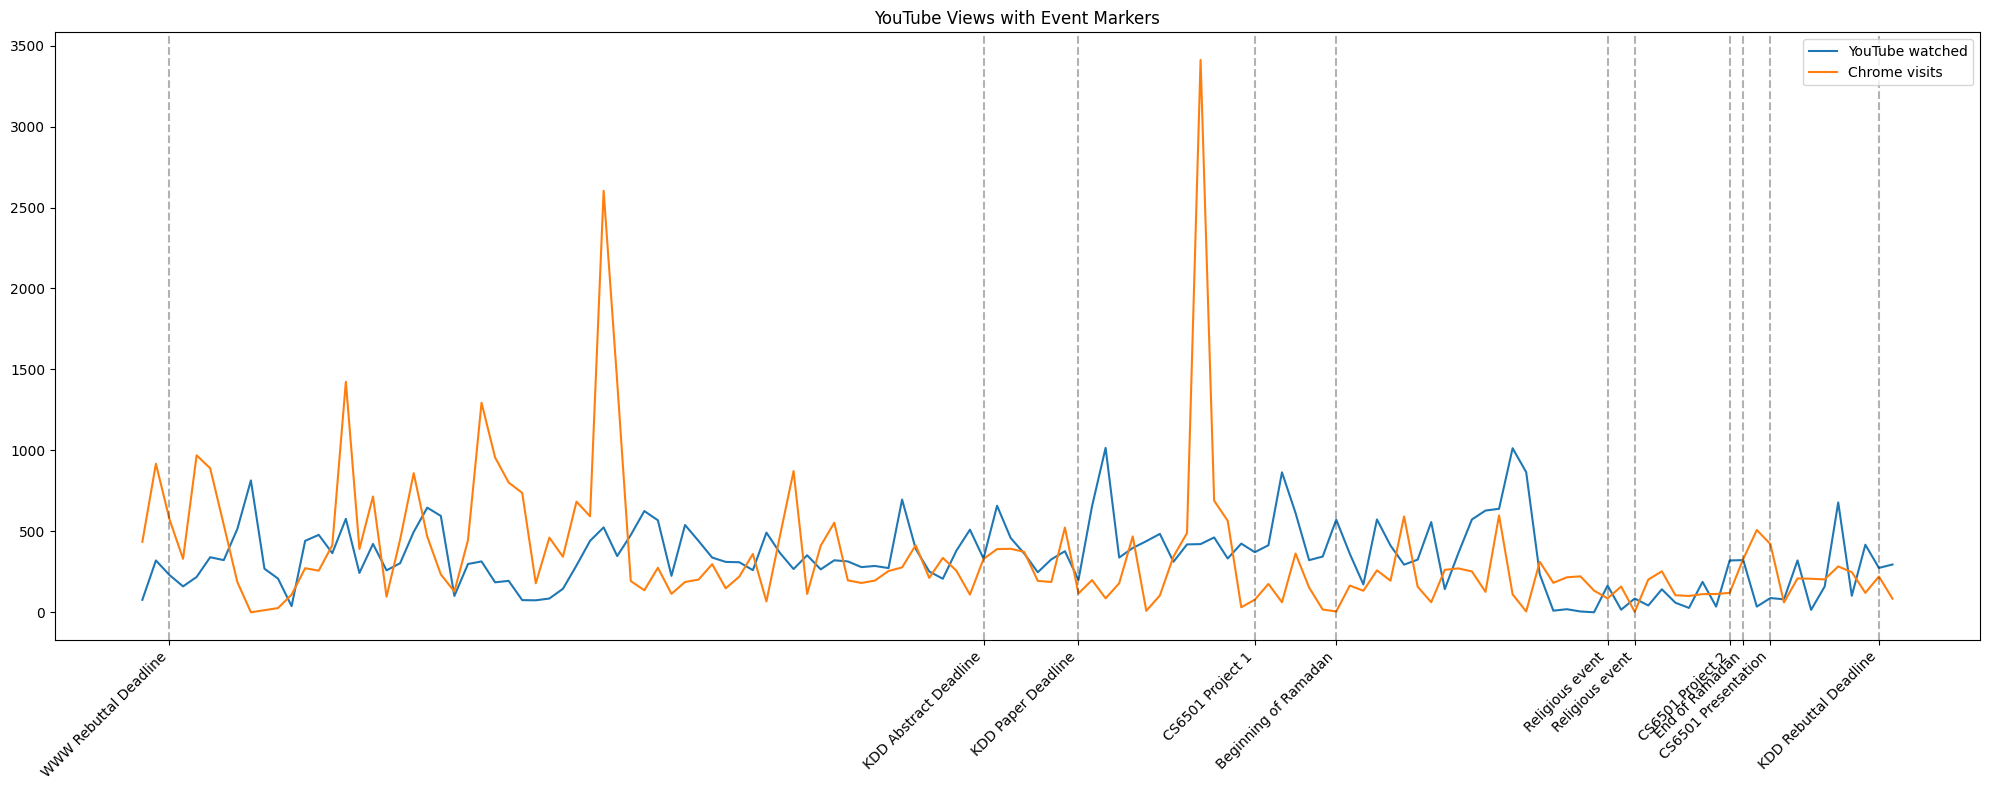

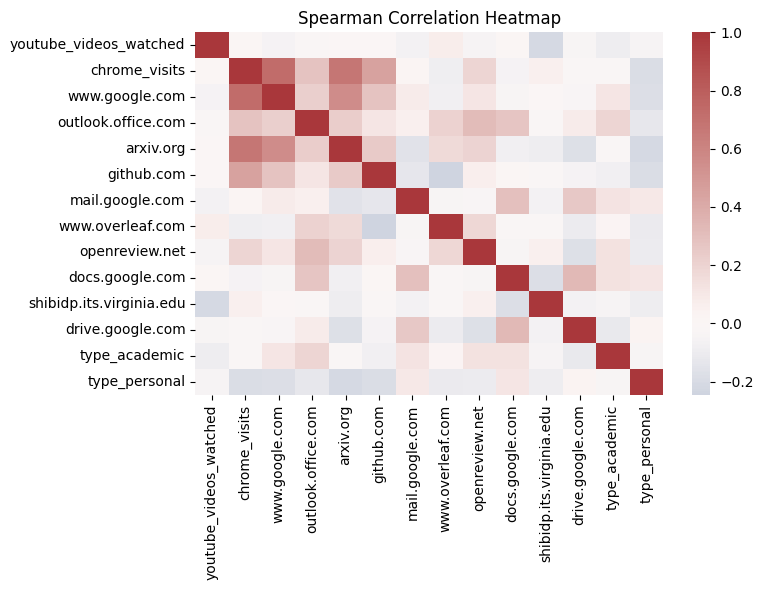

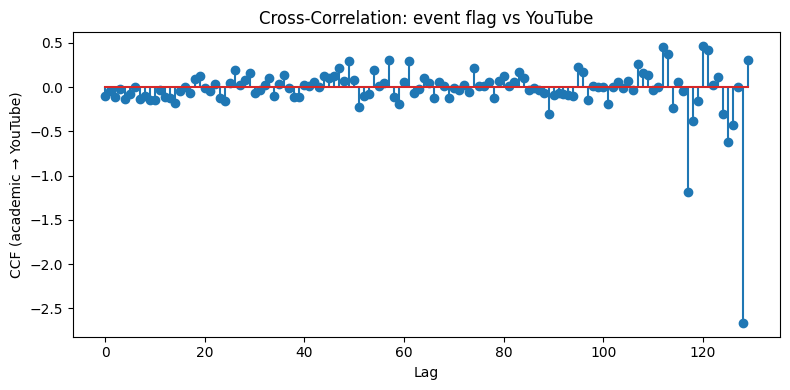

In [11]:
# --- 4. Exploratory plots ---
plt.figure(figsize=(20,8))
plt.plot(df.index, df['youtube_videos_watched'], label='YouTube watched')
plt.plot(df.index, df['chrome_visits'], label='Chrome visits')

# Add vertical lines for events
for ev in events.index:
    plt.axvline(ev, color='k', linestyle='--', alpha=0.3)

# Set x-ticks to event dates and titles
plt.xticks(events.index, events['event_title'], rotation=45, ha='right')

plt.legend()
plt.title('YouTube Views with Event Markers')
plt.tight_layout()


plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, center=0, cmap='vlag')
plt.title("Spearman Correlation Heatmap")
plt.tight_layout()

plt.figure(figsize=(8,4))
plt.stem(lags, ccf_vals)
plt.xlabel('Lag')
plt.ylabel('CCF (academic → YouTube)')
plt.title('Cross-Correlation: event flag vs YouTube')
plt.tight_layout()



In [16]:
# --- 5. Regression / Predictive Modeling ---
# Logistic regression: predict academic day from activity
X = df[['youtube_videos_watched','chrome_visits']]
# X = df[['youtube_videos_watched','chrome_visits'] + top10]
y = df['type_academic']
logreg = LogisticRegression(max_iter=1000).fit(X, y)
print("Logistic Regression coefficients (academic pred):\n", 
      pd.Series(logreg.coef_[0], index=X.columns).sort_values())
# Logistic regression: predict academic day from activity
X = df[['youtube_videos_watched','chrome_visits']]
# X = df[['youtube_videos_watched','chrome_visits'] + top10]
y = df['type_personal']
logreg = LogisticRegression(max_iter=1000).fit(X, y)
print("Logistic Regression coefficients (personal pred):\n", 
      pd.Series(logreg.coef_[0], index=X.columns).sort_values())

# Linear regression: effect of academic flag on YouTube views
linreg = LinearRegression().fit(df[['type_academic']], df['youtube_videos_watched'])
print(f"Linear effect of academic day on YouTube views: β = {linreg.coef_[0]:.3f}")

linreg = LinearRegression().fit(df[['type_personal']], df['youtube_videos_watched'])
print(f"Linear effect of personal day on YouTube views: β = {linreg.coef_[0]:.3f}")

linreg = LinearRegression().fit(df[['type_academic']], df['chrome_visits'])
print(f"Linear effect of academic day on Chrome visits: β = {linreg.coef_[0]:.3f}")

linreg = LinearRegression().fit(df[['type_personal']], df['chrome_visits'])
print(f"Linear effect of personal day on Chrome visits: β = {linreg.coef_[0]:.3f}")


plt.show()

Logistic Regression coefficients (academic pred):
 youtube_videos_watched   -0.002182
chrome_visits            -0.000918
dtype: float64
Logistic Regression coefficients (personal pred):
 chrome_visits            -0.010694
youtube_videos_watched   -0.001781
dtype: float64
Linear effect of academic day on YouTube views: β = -86.649
Linear effect of personal day on YouTube views: β = -57.024
Linear effect of academic day on Chrome visits: β = -98.177
Linear effect of personal day on Chrome visits: β = -260.734


In [21]:
# targets = [
#     date(2024, 12, 5),
#     date(2025, 2, 3),
#     date(2025, 2, 10),
#     date(2025, 2, 23),
#     date(2025, 3, 1),
#     date(2025, 3, 21),
#     date(2025, 3, 23),
#     date(2025, 3, 30),
#     date(2025, 3, 31),
#     date(2025, 4, 2),
#     date(2025, 4, 10),
# ]

# event_titles = [
#     "WWW Rebuttal Deadline",
#     "KDD Abstract Deadline",
#     "KDD Paper Deadline", 
#     "CS6501 Project 1",
#     "Beginning of Ramadan",
#     "End of Ramadan", 
#     "Religious event",
#     "Religious event",
#     "CS6501 Project 2",
#     "KDD Rebuttal Deadline",
#     "CS6501 Presentation"
# ]

# event_types = [
#     "academic",
#     "academic",
#     "academic", 
#     "academic",
#     "personal",
#     "personal", 
#     "personal",
#     "personal",
#     "academic",
#     "academic",
#     "academic"
# ]